# k2_cadence_events.ipynb

### Kenneth Mighell  
 
### 2019SEP25

In [1]:
version = 0.82
import os
pwd = os.getcwd()
nb = 'k2_cadence_events_0p82.ipynb'
print('%s=pwd' % (pwd))
print('%s=nb' % (nb))
print('%4.2f=version' % (version))
import datetime
print()
print('%s' % (str(datetime.datetime.now())))
print()
print('Now works with Python3!')

/Users/kmighell/top/k2_svn/k2ce_dev=pwd
k2_cadence_events_0p82.ipynb=nb
0.82=version

2019-09-25 10:01:36.967173

Now works with Python3!


In [2]:
# Set up the Jupyter notebook environment:
import numpy as np
import matplotlib.pyplot as plt
import time as tm
import sys
import copy
import warnings
try:
    import lightkurve as lk
    from lightkurve.utils import LightkurveWarning
except:
    print('***** ERROR *****\n') 
    print('The Python package lightkurve needs to be installed.\n')
    print('This is the installation command for lightkurve using pip:\n')
    print('pip install lightkurve --upgrade\n')
    print('For further installation details see the lightkurve homepage:\n')
    print('http://lightkurve.keplerscience.org/install.html')
    os.exit(1)
color = ['dodgerblue','red','slategrey','navy']

In [3]:
# EPIC 212803289 (the exoplanet K2-99b) [C17]
epic = 212803289 # EPIC number
target = str(epic)
target_name = 'K2-99b'
period_212803289 = 18.249 # days

### A new Python function: k2_cadence_events()

In [4]:
from k2_cadence_events import k2_cadence_events as k2_cadence_events
from k2_cadence_events import k2_cadence_events as k2ce  # short form

  
#### This function can be called without any keywords: k2_cadence_events( ) 

**********************************************
Kepler K2 Cadence Events (k2ce): Version 0.86
**********************************************

Using default target (exoplanet K2-99b):

  from_archive=True
  target=212803289
  campaign=17
  cadence=short

filename=/Users/kmighell/.lightkurve-cache/mastDownload/K2/ktwo212803289-c17_sc/ktwo212803289-c17_slc.fits

Kepler/K2 short cadence Light Curve File

K2 Campaign 17

target: EPIC 212803289

98490 cadences

Using default bitmask value of 1605636.

The bitmask value of 1605636 = 110001000000000000100

translates as

['Coarse point', 'No fine point', 'Possible thruster firing', 'Thruster firing']



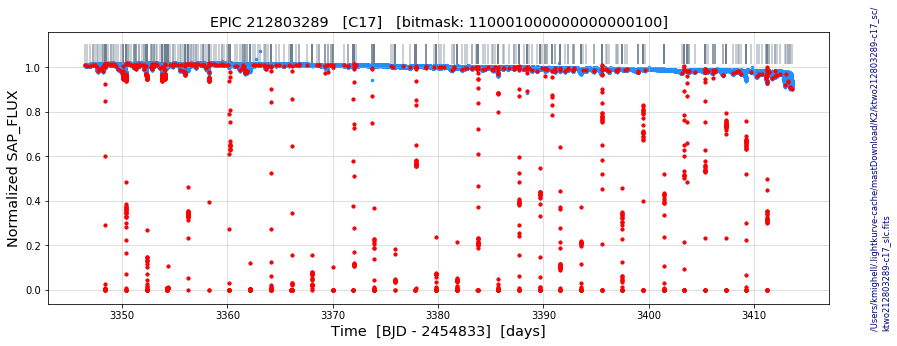

In [5]:
k2_cadence_events();

This plot shows the short cadence observations of EPIC 212803289  
(exoplanet: K2-99b) that were obtained during K2 Campaign 17

The short-cadence K2 light curve file was downloaded automatically from  
the Barbara A. Mikulski Archive for Space Telescopes (MAST) at the Space  
Telescope Science Institute (STScI).

The red points are the data that had  a SAP_QUALITY value with either Bit21  
(1048576 = (2\*\*20)) and/or Bit20 (524288 = (2\*\*19)) and/or Bit16 (32768 =  
(2\*\*15)) and/or (4 = (2\*\*2)) set -- which indicates a either an actual or   
probable thruster firing event or a coarse point or not in fine point.   

The blue points are the data that did not have one of these bits set.

The grey vertical bars near the top of the plot show events.  
The darker the grey, the greater the number of events in time.

The name of the Kepler/K2 short cadence light curve file analysed is shown  
on the right side of the plot.  Note that this is where the file is stored  
locally.


#### Show actual thruster firing events:

**********************************************
Kepler K2 Cadence Events (k2ce): Version 0.86
**********************************************

filename=/Users/kmighell/.lightkurve-cache/mastDownload/K2/ktwo212803289-c17_sc/ktwo212803289-c17_slc.fits

Kepler/K2 short cadence Light Curve File

K2 Campaign 17

target: EPIC 212803289

98490 cadences



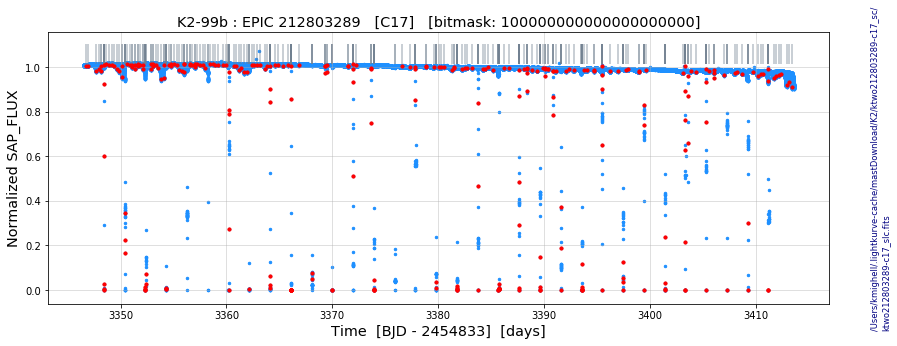


359 events




In [6]:
target = 'EPIC212803289'
cadence = 'short'
campaign = 17
tag = 'K2-99b : '

bitmask = 1048576 # thruster firing 

ax, n_events, _, _ = k2_cadence_events(from_archive=True,target=target,\
  cadence=cadence,campaign=campaign,bitmask=bitmask,tag=tag)

print('\n%d events\n\n' % (n_events))


#### Show the actual and possible thruster firing events:

**********************************************
Kepler K2 Cadence Events (k2ce): Version 0.86
**********************************************

filename=/Users/kmighell/.lightkurve-cache/mastDownload/K2/ktwo212803289-c17_sc/ktwo212803289-c17_slc.fits

Kepler/K2 short cadence Light Curve File

K2 Campaign 17

target: EPIC 212803289

98490 cadences



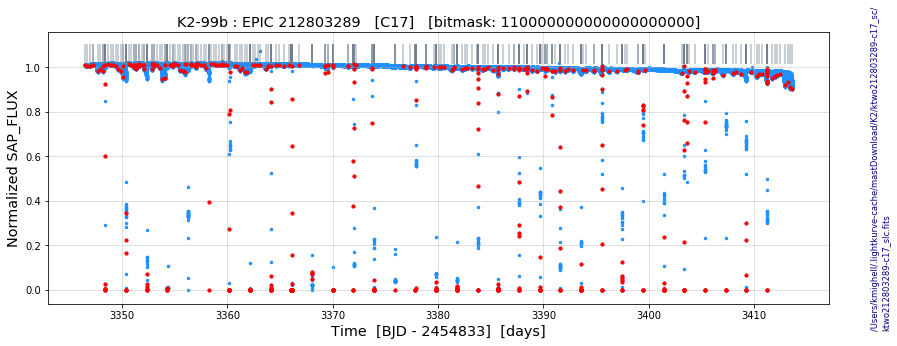


542 events




In [7]:
bitmask = 1048576 # Thruster firing 
bitmask += 524288 # Possible thruster firing

ax, n_events, _, _ = k2_cadence_events(from_archive=True,target=target,\
  cadence=cadence,campaign=campaign,bitmask=bitmask,tag=tag)

print('\n%d events\n\n' % (n_events))

The red points are the data that had Bit21 and/or Bit20 set. 

The blue points are the data that did *not* have Bit21 and/or Bit20 set.

  
  
#### We now look at the start of the campaign using the *xlim* keyword:

**********************************************
Kepler K2 Cadence Events (k2ce): Version 0.86
**********************************************

filename=/Users/kmighell/.lightkurve-cache/mastDownload/K2/ktwo212803289-c17_sc/ktwo212803289-c17_slc.fits

Kepler/K2 short cadence Light Curve File

K2 Campaign 17

target: EPIC 212803289

98490 cadences



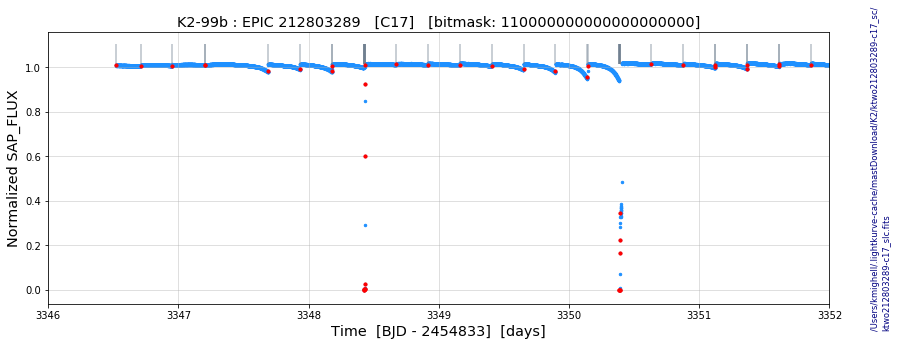


542 events




In [8]:
ax, n_events, _, _ = k2_cadence_events(from_archive=True,target=target,\
  cadence=cadence,campaign=campaign,bitmask=bitmask,tag=tag,xlim=(3346,3352))

print('\n%d events\n\n' % (n_events))

#### We can focus on the top of the plot using the *ylim* keyword:

**********************************************
Kepler K2 Cadence Events (k2ce): Version 0.86
**********************************************

filename=/Users/kmighell/.lightkurve-cache/mastDownload/K2/ktwo212803289-c17_sc/ktwo212803289-c17_slc.fits

Kepler/K2 short cadence Light Curve File

K2 Campaign 17

target: EPIC 212803289

98490 cadences



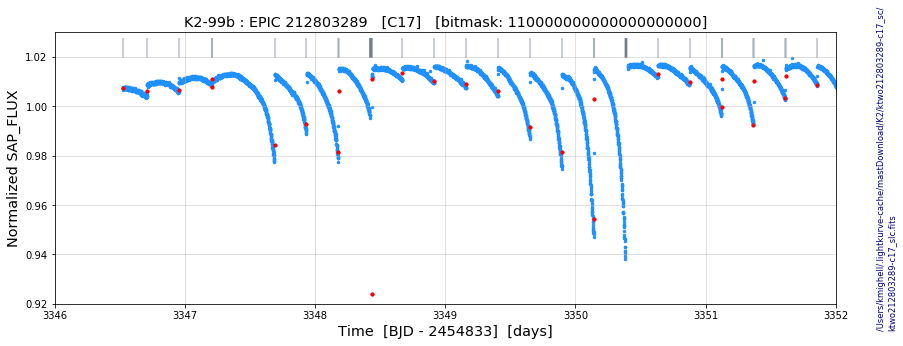


542 events




In [9]:
ax, n_events, _, _ = k2_cadence_events(from_archive=True,target=target,\
  cadence=cadence,campaign=campaign,bitmask=bitmask,tag=tag,xlim=(3346,3352),\
  ylim=(0.92,1.03))

print('\n%d events\n\n' % (n_events))

#### An analysis of events per bit in these observations:

bitmask = 1       #    0 events (Attitude Tweak)  
bitmask = 2       #    0 events (Safe Mode)  
bitmask = 4       #  816 events (Coarse Point)  
bitmask = 8       #    0 events (Earth Point)  
bitmask = 16      #    0 events (Zero crossing)  
bitmask = 32      #    0 events (Desaturation event)  
bitmask = 64      #    0 events (Argabrightening)  
bitmask = 128     #    0 events (Cosmic ray in optimal aperture)  
bitmask = 256     #    0 events (Manual exclude)  
bitmask = 512     #    0 events (UNUSED)  
bitmask = 1024    #    0 events (Sudden sensitivity dropout)  
bitmask = 2048    #  236 events (Impulsive Outlier)  
bitmask = 4096    #    7 events (Argabrightening on CCD)  
bitmask = 8192    # 1735 events (Cosmic ray in collateral data)  
bitmask = 16384   #    0 events (Detector anomaly)  
bitmask = 32768   # 1236 events (No fine point)  
bitmask = 65536   #  180 events (No data)  
bitmask = 131072  #    0 events (Rolling band in optimal aperture)  
bitmask = 262144  #    0 events (Rolling band in full mask)  
bitmask = 524288  #  183 events (Possible thruster firing)  
bitmask = 1048576 #  359 events (Thruster firing)  

#### You can get a report by setting the *report* keyword to *True*:

**********************************************
Kepler K2 Cadence Events (k2ce): Version 0.86
**********************************************

filename=/Users/kmighell/.lightkurve-cache/mastDownload/K2/ktwo212803289-c17_sc/ktwo212803289-c17_slc.fits

Kepler/K2 short cadence Light Curve File

K2 Campaign 17

target: EPIC 212803289

98490 cadences

# REPORT
#
# /Users/kmighell/.lightkurve-cache/mastDownload/K2/ktwo212803289-c17_sc/ktwo212803289-c17_slc.fits
#
# 7 events with bitmask value of 4096 (= 000000001000000000000)
#
#  Event         Time  Normalized_Flux  CADENCENO  =============QUALITY============
       1  3348.427489              nan   4744607   561156 = 010001001000000000100
       2  3360.198411              nan   4761887   561156 = 010001001000000000100
       3  3364.122060              nan   4767647   561156 = 010001001000000000100
       4  3364.331185              nan   4767954     4096 = 000000001000000000000
       5  3375.890959              nan   4784924   561156 = 01

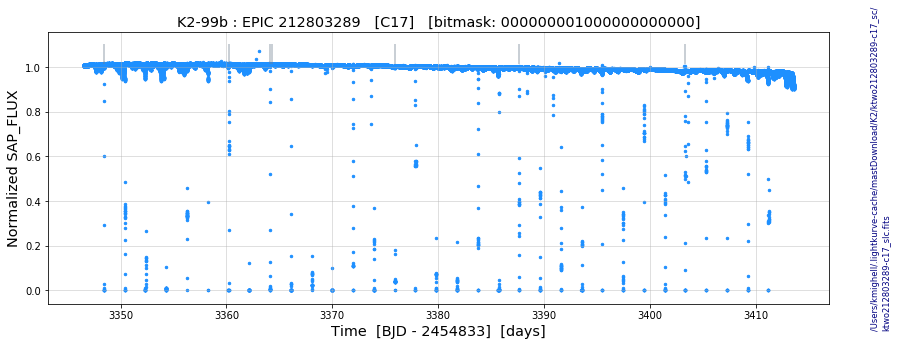

In [10]:
bitmask = 4096  # Argabrightening event

ax, n_events, _, _ = k2_cadence_events(from_archive=True,target=target,
  cadence=cadence,campaign=campaign,bitmask=bitmask,tag=tag,report=True)

Notice that all of the flux values have been set to nan (not a number).  
This is why you do not see any red points on this plot.

  
  
#### You can save the same report in a text file using the *report_filename* keyword.

**********************************************
Kepler K2 Cadence Events (k2ce): Version 0.86
**********************************************

filename=/Users/kmighell/.lightkurve-cache/mastDownload/K2/ktwo212803289-c17_sc/ktwo212803289-c17_slc.fits

Kepler/K2 short cadence Light Curve File

K2 Campaign 17

target: EPIC 212803289

98490 cadences


212803289_report.txt <--- report written  :-)




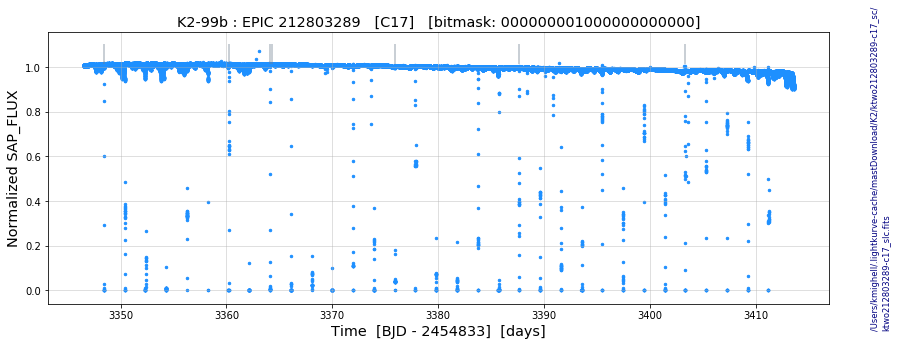



Show the contents of the new report file:

# REPORT
#
# /Users/kmighell/.lightkurve-cache/mastDownload/K2/ktwo212803289-c17_sc/ktwo212803289-c17_slc.fits
#
# 7 events with bitmask value of 4096 (= 000000001000000000000)
#
#  Event         Time  Normalized_Flux  CADENCENO  ===========QUALITY============
       1  3348.427489              nan   4744607   561156 = 010001001000000000100
       2  3360.198411              nan   4761887   561156 = 010001001000000000100
       3  3364.122060              nan   4767647   561156 = 010001001000000000100
       4  3364.331185              nan   4767954     4096 = 000000001000000000000
       5  3375.890959              nan   4784924   561156 = 010001001000000000100
       6  3387.663904              nan   4802207    36868 = 000001001000000000100
       7  3403.358290              nan   4825247    36868 = 000001001000000000100


In [11]:
report_filename = str(epic)+'_report.txt'

ax, n_events, _, _ = k2_cadence_events(from_archive=True,target=target,
  cadence=cadence,campaign=campaign,bitmask=bitmask,tag=tag,\
  report_filename=report_filename,overwrite=True)
plt.show()

print('\n\nShow the contents of the new report file:\n')
!cat 212803289_report.txt

#### Make a line plot (instead of a scatter plot) by setting the *scatter* keyword to be *False* :

**********************************************
Kepler K2 Cadence Events (k2ce): Version 0.86
**********************************************

filename=/Users/kmighell/.lightkurve-cache/mastDownload/K2/ktwo212803289-c17_sc/ktwo212803289-c17_slc.fits

Kepler/K2 short cadence Light Curve File

K2 Campaign 17

target: EPIC 212803289

98490 cadences



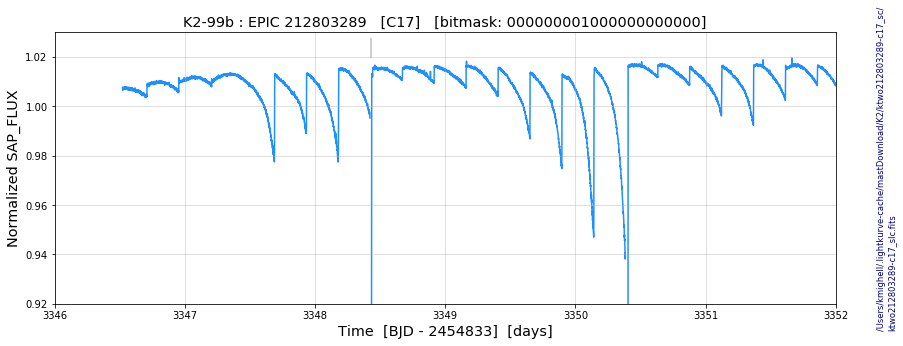


7 events




In [12]:

ax, n_events, _, _ = k2_cadence_events(from_archive=True,target=target,\
  cadence=cadence,campaign=campaign,bitmask=bitmask,tag=tag,xlim=(3346,3352),\
  ylim=(0.92,1.03),scatter=False)

print('\n%d events\n\n' % (n_events))

#### Let us see when the spacecraft was *not* in fine point:

**********************************************
Kepler K2 Cadence Events (k2ce): Version 0.86
**********************************************

filename=/Users/kmighell/.lightkurve-cache/mastDownload/K2/ktwo212803289-c17_sc/ktwo212803289-c17_slc.fits

Kepler/K2 short cadence Light Curve File

K2 Campaign 17

target: EPIC 212803289

98490 cadences



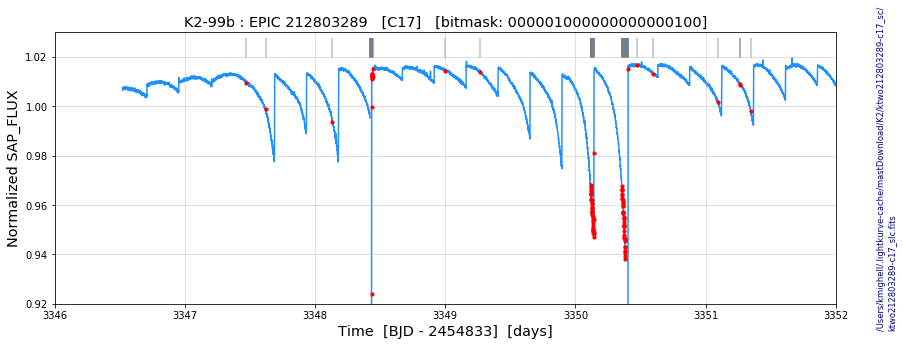


1450 events




In [13]:
bitmask = (2**15)  # Spacecraft is not in fine point 
bitmask += (2**2)  # Spacecraft is in coarse point

ax, n_events, _, _ = k2_cadence_events(from_archive=True,target=target,\
  cadence=cadence,campaign=campaign,bitmask=bitmask,tag=tag,xlim=(3346,3352),\
  ylim=(0.92,1.03),scatter=False)

print('\n%d events\n\n' % (n_events))

#### Show the entire campaign:

**********************************************
Kepler K2 Cadence Events (k2ce): Version 0.86
**********************************************

filename=/Users/kmighell/.lightkurve-cache/mastDownload/K2/ktwo212803289-c17_sc/ktwo212803289-c17_slc.fits

Kepler/K2 short cadence Light Curve File

K2 Campaign 17

target: EPIC 212803289

98490 cadences



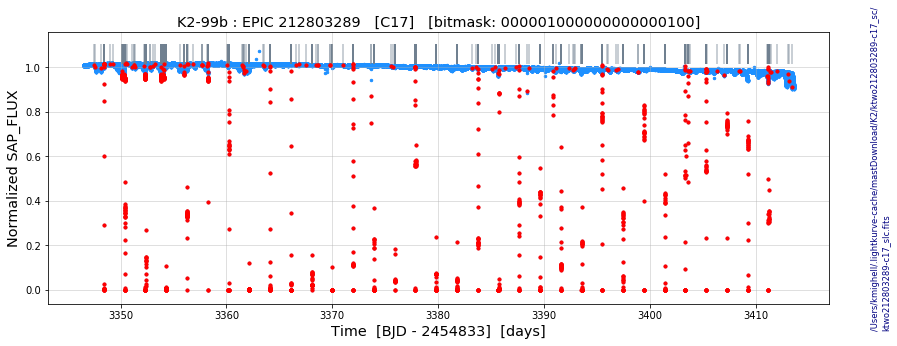


1450 events




In [14]:
ax, n_events, _, _ = k2_cadence_events(from_archive=True,target=target,
  cadence=cadence,campaign=campaign,bitmask=bitmask,tag=tag)

print('\n%d events\n\n' % (n_events))

Bit16 and Bit4 account for nearly all of the bad data with normalized
SAP_FLUX values below 0.9 .

### The k2_cadence_events function also returns the *KeplerLightCurveFile* and the  *events index* :

**********************************************
Kepler K2 Cadence Events (k2ce): Version 0.86
**********************************************

filename=/Users/kmighell/.lightkurve-cache/mastDownload/K2/ktwo212803289-c17_sc/ktwo212803289-c17_slc.fits

Kepler/K2 short cadence Light Curve File

K2 Campaign 17

target: EPIC 212803289

98490 cadences



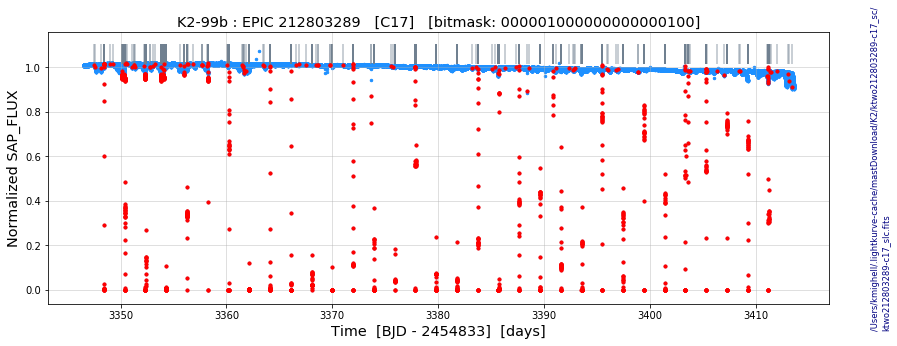


1450 events




In [15]:
ax, n_events, lcf_, idx_ = k2_cadence_events(from_archive=True,target=target,\
  cadence=cadence,campaign=campaign,bitmask=bitmask,tag=tag)

print('\n%d events\n\n' % (n_events))

#### The KeplerLightCurveFile ( lcf_ ) and the events index ( idx_ ) can then be  used to make a light curve with the bad cadences removed:  

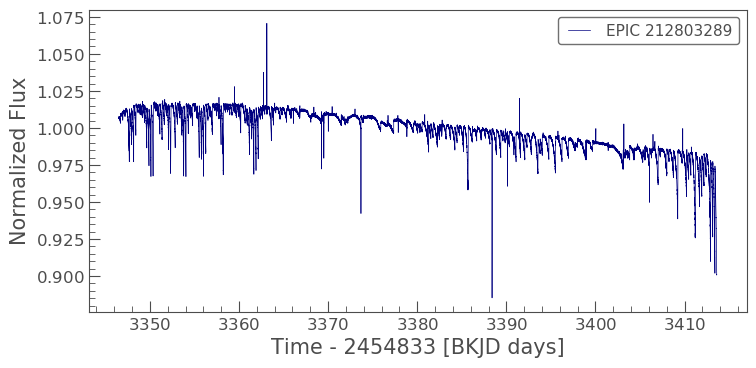

In [16]:
with warnings.catch_warnings():
    # Ignore "LightCurve contains NaN times" warnings triggered by the liberal mask
    warnings.simplefilter("ignore", LightkurveWarning)
    lc_ = lcf_.get_lightcurve('SAP_FLUX')[~idx_]
lc_.remove_nans().plot(color=color[3]);

#### Compare with the original light curve:

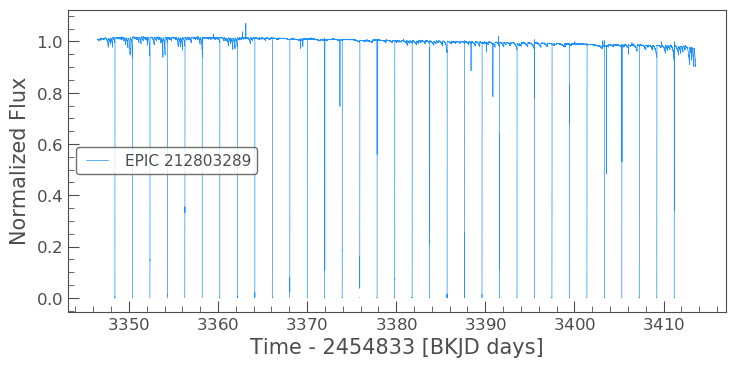

In [17]:
with warnings.catch_warnings():
    # Ignore "LightCurve contains NaN times" warnings triggered by the liberal mask
    warnings.simplefilter("ignore", LightkurveWarning)
    lc_old = lcf_.get_lightcurve('SAP_FLUX')
lc_old.plot(color=color[0]);

If you want to create a new light curve file that does has the bad cadences removed,
use the new_filename keyword:

**********************************************
Kepler K2 Cadence Events (k2ce): Version 0.86
**********************************************

filename=/Users/kmighell/.lightkurve-cache/mastDownload/K2/ktwo212803289-c17_sc/ktwo212803289-c17_slc.fits

Kepler/K2 short cadence Light Curve File

K2 Campaign 17

target: EPIC 212803289

98490 cadences


my_new_filename.fits  <--- new FITS file written  :-)



1450 events




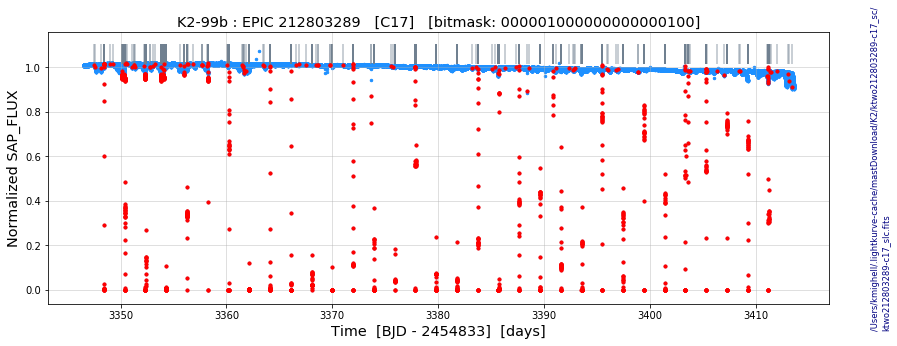

In [18]:
_, n_events, _, _ = k2_cadence_events(from_archive=True,target=target,show_plot=False,overwrite=True,
  cadence=cadence,campaign=campaign,bitmask=bitmask,tag=tag,new_filename='my_new_filename.fits')

print('\n%d events\n\n' % (n_events))

explore the new light curve file:

**********************************************
Kepler K2 Cadence Events (k2ce): Version 0.86
**********************************************

filename=/Users/kmighell/top/k2_svn/k2ce_dev/my_new_filename.fits

Kepler/K2 short cadence Light Curve File

K2 Campaign 17

target: EPIC 212803289

97040 cadences



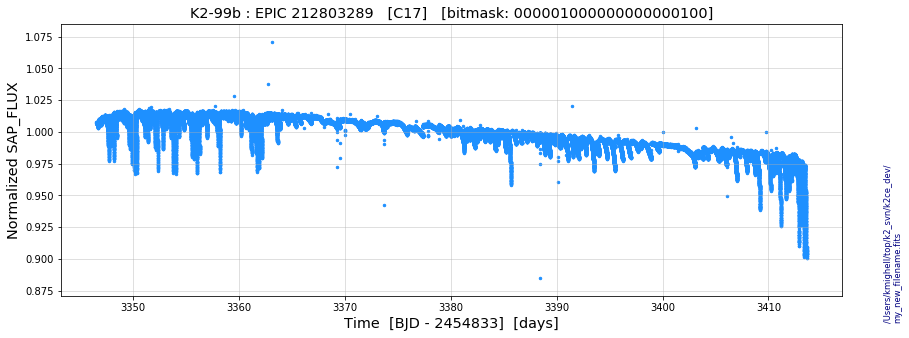


0 events




In [19]:
ax, n_events, _, _ = k2_cadence_events(filename='my_new_filename.fits',bitmask=bitmask,tag=tag)

print('\n%d events\n\n' % (n_events))

####  

### Now that we can identify cadences with bad data, can we simple remove ("clip") those bad observations (cadences) and get better phased light curves?  

####  

#### Show the original PDCAAP_FLUX data:

**********************************************
Kepler K2 Cadence Events (k2ce): Version 0.86
**********************************************

filename=/Users/kmighell/.lightkurve-cache/mastDownload/K2/ktwo212803289-c17_sc/ktwo212803289-c17_slc.fits

Kepler/K2 short cadence Light Curve File

K2 Campaign 17

target: EPIC 212803289

98490 cadences



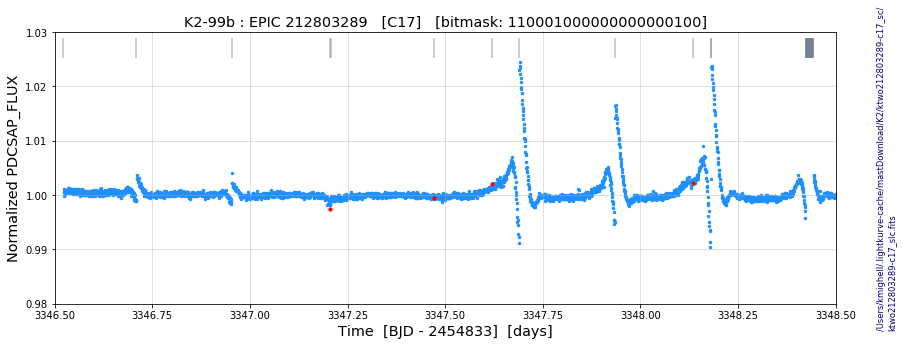

In [20]:
bitmask = (2**20) + (2**19) + (2**15) + (2**2)

ax, n_events, lcf_, idx = k2_cadence_events(from_archive=True,target=target,\
  cadence=cadence,campaign=campaign,bitmask=bitmask,tag=tag,SAP_FLUX=False,\
  xlim=(3346.5,3348.5),ylim=(0.98,1.03))

#### Mark bad data (as red) : From 60 observations (cadences) before an event to 90 observations after an event:

**********************************************
Kepler K2 Cadence Events (k2ce): Version 0.86
**********************************************

filename=/Users/kmighell/.lightkurve-cache/mastDownload/K2/ktwo212803289-c17_sc/ktwo212803289-c17_slc.fits

Kepler/K2 short cadence Light Curve File

K2 Campaign 17

target: EPIC 212803289

98490 cadences



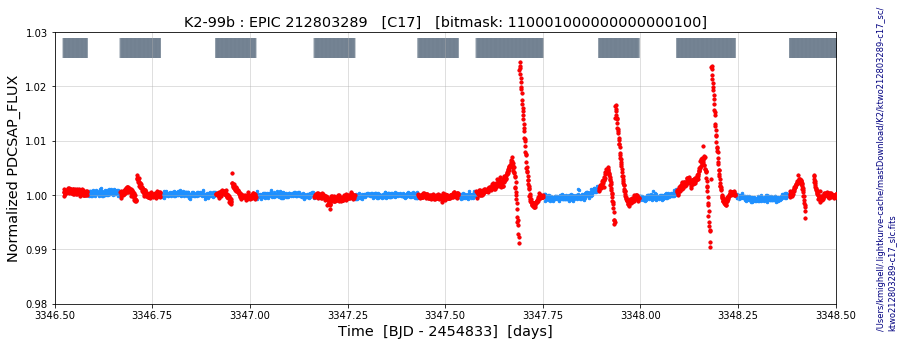

In [21]:
bitmask = (2**20) + (2**19) + (2**15) + (2**2)

n_before = 60 # number of cadences before event to mark as bad

n_after = 90 # number of cadences after event to mark as bad

ax, n_events, lcf_, jdx = k2_cadence_events(from_archive=True,target=target,\
  cadence=cadence,campaign=campaign,bitmask=bitmask,tag=tag,SAP_FLUX=False,\
  n_before=n_before,n_after=n_after,\
  xlim=(3346.5,3348.5),ylim=(0.98,1.03))

#### Light curves :  Original vs. Clipped

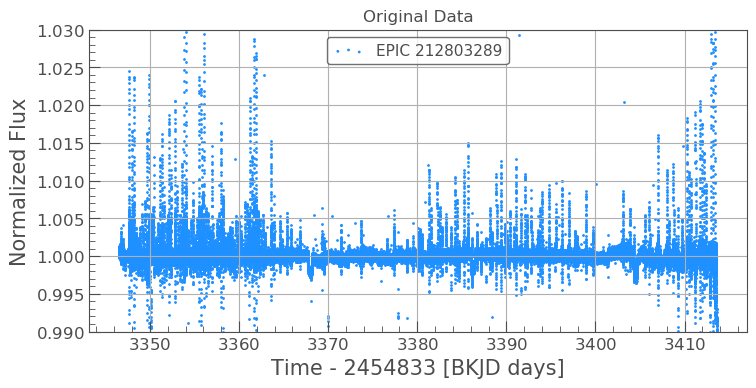

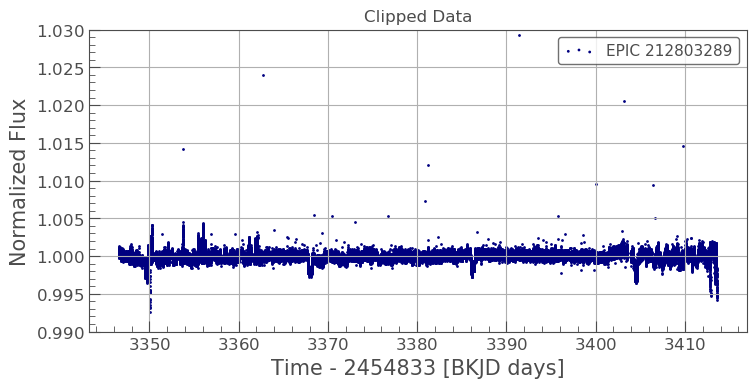

In [22]:
with warnings.catch_warnings():
    # Ignore "LightCurve contains NaN times" warnings triggered by the liberal mask
    warnings.simplefilter("ignore", LightkurveWarning)
    lca = lcf_.get_lightcurve('PDCSAP_FLUX')
ax = lca.scatter(color=color[0]);
ax.grid(True)
ax.set_ylim(0.99,1.03)
ax.set_title('Original Data')

with warnings.catch_warnings():
    # Ignore "LightCurve contains NaN times" warnings triggered by the liberal mask
    warnings.simplefilter("ignore", LightkurveWarning)
    lcb = lcf_.get_lightcurve('PDCSAP_FLUX')[~jdx]
ax = lcb.scatter(color=color[3]);
ax.grid(True)
ax.set_ylim(0.99,1.03)
ax.set_title('Clipped Data');


### Can you find the four transits in the clipped data?   In the original data?  
  
  

#### Phased light curves (P=18.249 days) : Original vs. Clipped

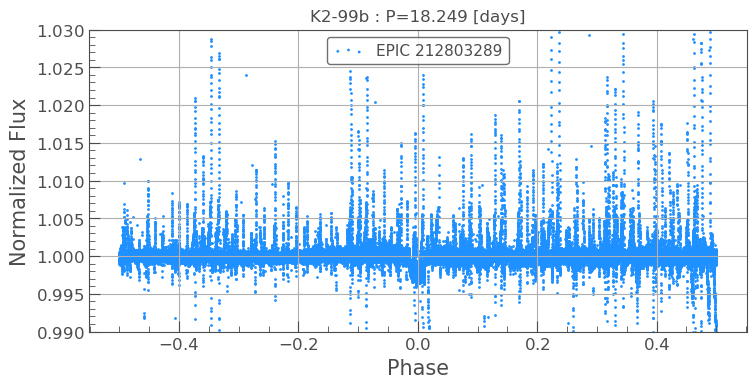

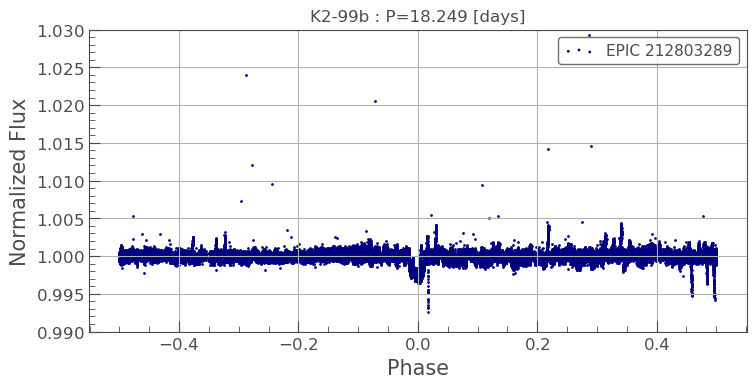

In [23]:
with warnings.catch_warnings():
    # Ignore "LightCurve contains NaN times" warnings triggered by the liberal mask
    warnings.simplefilter("ignore", LightkurveWarning)
    lc_ = lcf_.get_lightcurve('PDCSAP_FLUX')
lca = lc_.remove_nans()
n_lca = lca.time.size
plca = lca.fold(period=18.249,t0=3368);
ax = plca.scatter(color=color[0])
ax.grid(True)
ax.set_title('K2-99b : P=18.249 [days]')
ax.set_ylim(0.99,1.03)

with warnings.catch_warnings():
    # Ignore "LightCurve contains NaN times" warnings triggered by the liberal mask
    warnings.simplefilter("ignore", LightkurveWarning)
    lc_ = lcf_.get_lightcurve('PDCSAP_FLUX')[~jdx]
lcc = lc_.remove_nans()
n_lcc = lcc.time.size
plcc = lcc.fold(period=18.249,t0=3368);
ax = plcc.scatter(color=color[3])
ax.grid(True)
ax.set_title('K2-99b : P=18.249 [days]')
ax.set_ylim(0.99,1.03);

#### The clipped phased light curve looks a lot better than the original phased light curve.

#### But at what cost?  

#### We have removed (clipped) just over half of the original light curve data.  
  

### What was the percentage lost by clipping?

In [24]:
clipped_size = lcc.time.size*1.
original_size = lca.time.size*1.
percent = (1.-((clipped_size)/(original_size)))*100
print('%6.2f percent' % (percent))

 33.24 percent


### New target: EPIC_206003187 [C3R] : a RR Lyrae (type ab) exhibiting the Blazhko effect


Show the entire campaign:

**********************************************
Kepler K2 Cadence Events (k2ce): Version 0.86
**********************************************

filename=/Users/kmighell/.lightkurve-cache/mastDownload/K2/ktwo206003187-c03_sc/ktwo206003187-c03_slc.fits

Kepler/K2 short cadence Light Curve File

K2 Campaign 3

target: EPIC 206003187

101580 cadences



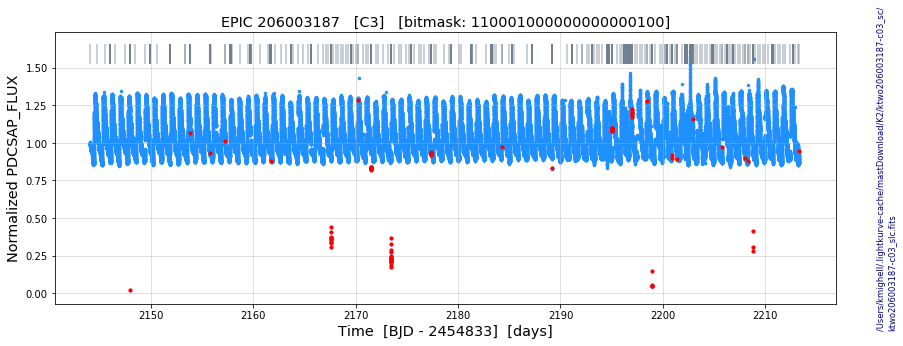


Show a good section of the observations:

**********************************************
Kepler K2 Cadence Events (k2ce): Version 0.86
**********************************************

filename=/Users/kmighell/.lightkurve-cache/mastDownload/K2/ktwo206003187-c03_sc/ktwo206003187-c03_slc.fits

Kepler/K2 short cadence Light Curve File

K2 Campaign 3

target: EPIC 206003187

101580 cadences



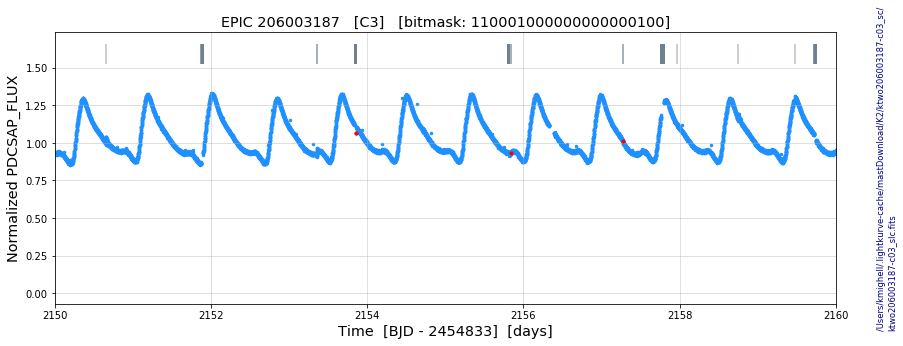


Show a problematic section of the observations:

**********************************************
Kepler K2 Cadence Events (k2ce): Version 0.86
**********************************************

filename=/Users/kmighell/.lightkurve-cache/mastDownload/K2/ktwo206003187-c03_sc/ktwo206003187-c03_slc.fits

Kepler/K2 short cadence Light Curve File

K2 Campaign 3

target: EPIC 206003187

101580 cadences



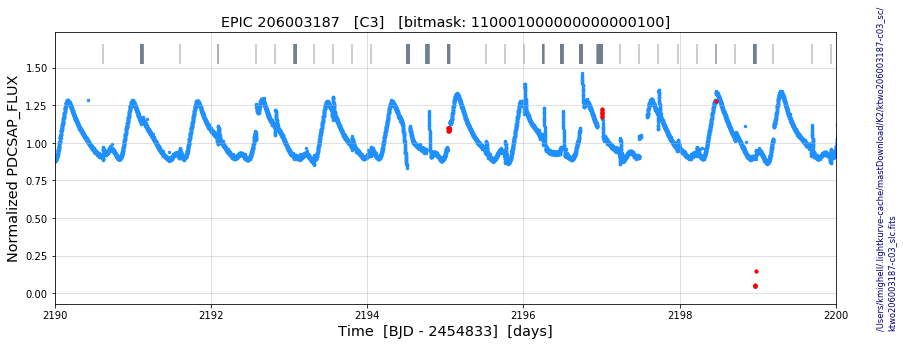


Note that most of the problematic features are plotted as blue.


1900 events




In [25]:
bitmask = (2**20) + (2**19) + (2**15) + (2**2)

#filename = 'ktwo206003187-c03_slc.fits'  # C3R now available from MAST :-)
target = 'EPIC 206003187'
cadence = 'short'
campaign = 3
period_206003187 = 0.829 # days

SAP_FLUX = False
n_before = 0
n_after  = 0 

print('\nShow the entire campaign:\n'); sys.stdout.flush()
ax, n_events, lcf_, jdx = k2_cadence_events(target=target,cadence=cadence,campaign=campaign,\
  bitmask=bitmask,SAP_FLUX=SAP_FLUX,n_before=n_before,n_after=n_after)
plt.show();

print('\nShow a good section of the observations:\n'); sys.stdout.flush()
ax, n_events, lcf_, jdx = k2_cadence_events(target=target,cadence=cadence,campaign=campaign,\
  bitmask=bitmask,SAP_FLUX=SAP_FLUX,n_before=n_before,n_after=n_after,xlim=(2150,2160),bitmask_decode=False)
plt.show();

print('\nShow a problematic section of the observations:\n'); sys.stdout.flush()
ax, n_events, lcf_, jdx = k2_cadence_events(target=target,cadence=cadence,campaign=campaign,\
  bitmask=bitmask,SAP_FLUX=SAP_FLUX,n_before=n_before,n_after=n_after,xlim=(2190,2200),bitmask_decode=False)
plt.show();

print('\nNote that most of the problematic features are plotted as blue.')
print('\n\n%d events\n\n' % (n_events))

#### Compare the phased light curves of the original and lightly clipped data:


Show the phased light curve of the original data:



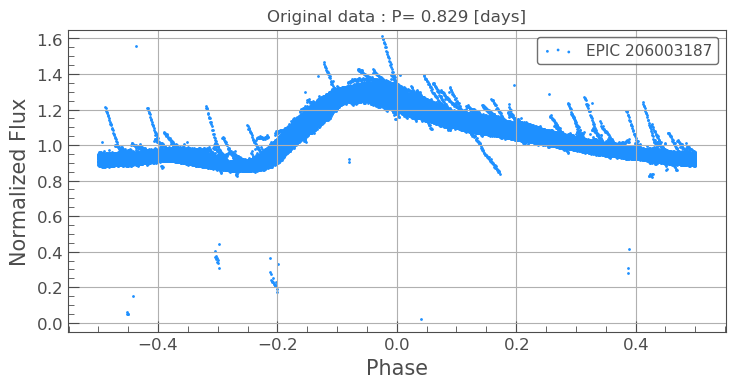


Show the phased light curve of the lightly clipped data:



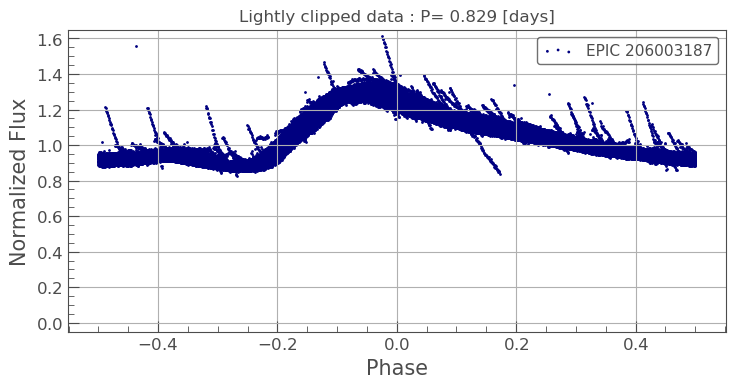

The lightly clipped data has  99563 observations (cadences).
The original data        has  99656 observations (cadences).

n_before=0
 n_after=0


In [26]:
period = 0.829 # days # EPIC_206003187 (a RRab Lyrae w/ Blazhko effect)

print('\nShow the phased light curve of the original data:\n')
sys.stdout.flush()
with warnings.catch_warnings():
    # Ignore "LightCurve contains NaN times" warnings triggered by the liberal mask
    warnings.simplefilter("ignore", LightkurveWarning)
    lc_ = lcf_.get_lightcurve('PDCSAP_FLUX')
lca = lc_.remove_nans()
n_lca = lca.time.size
plca = lca.fold(period=period);
ax = plca.scatter(color=color[0])
ax.grid(True)
ax.set_title('Original data : P=%6.3f [days]' % (period))
ax.set_ylim(-0.05,1.65)
plt.show();

print('\nShow the phased light curve of the lightly clipped data:\n')
sys.stdout.flush()
with warnings.catch_warnings():
    # Ignore "LightCurve contains NaN times" warnings triggered by the liberal mask
    warnings.simplefilter("ignore", LightkurveWarning)
    lc_ = lcf_.get_lightcurve('PDCSAP_FLUX')[~jdx]
lcc = lc_.remove_nans()
n_lcc = lcc.time.size
plcc = lcc.fold(period=period);
ax = plcc.scatter(color=color[3])
ax.grid(True)
ax.set_title('Lightly clipped data : P=%6.3f [days]' % (period))
ax.set_ylim(-0.05,1.65);
plt.show()

print('The lightly clipped data has %6d observations (cadences).' % (n_lcc))
print('The original data        has %6d observations (cadences).' % (n_lca))

print('\nn_before=%d' % (n_before))
print(' n_after=%d' % (n_after))

  
  
#### Remove 60 cadences before (n_before=60) and after (n_after=60) each event:
  


Show the entire campaign:

**********************************************
Kepler K2 Cadence Events (k2ce): Version 0.86
**********************************************

filename=/Users/kmighell/.lightkurve-cache/mastDownload/K2/ktwo206003187-c03_sc/ktwo206003187-c03_slc.fits

Kepler/K2 short cadence Light Curve File

K2 Campaign 3

target: EPIC 206003187

101580 cadences



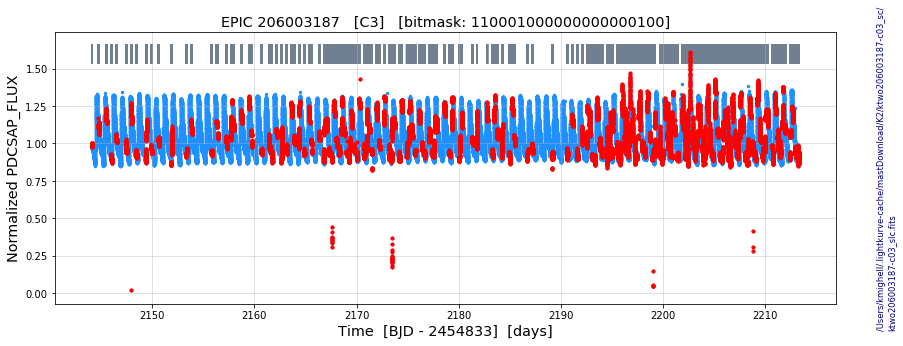


Show a good section of the observations:

**********************************************
Kepler K2 Cadence Events (k2ce): Version 0.86
**********************************************

filename=/Users/kmighell/.lightkurve-cache/mastDownload/K2/ktwo206003187-c03_sc/ktwo206003187-c03_slc.fits

Kepler/K2 short cadence Light Curve File

K2 Campaign 3

target: EPIC 206003187

101580 cadences



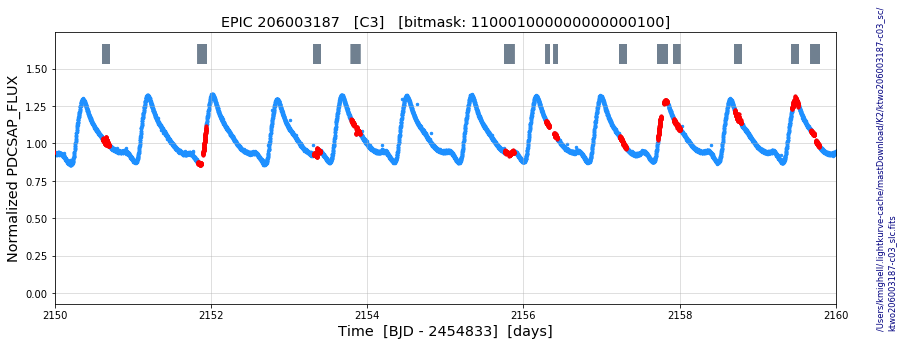


Show a problematic section of the observations:

**********************************************
Kepler K2 Cadence Events (k2ce): Version 0.86
**********************************************

filename=/Users/kmighell/.lightkurve-cache/mastDownload/K2/ktwo206003187-c03_sc/ktwo206003187-c03_slc.fits

Kepler/K2 short cadence Light Curve File

K2 Campaign 3

target: EPIC 206003187

101580 cadences



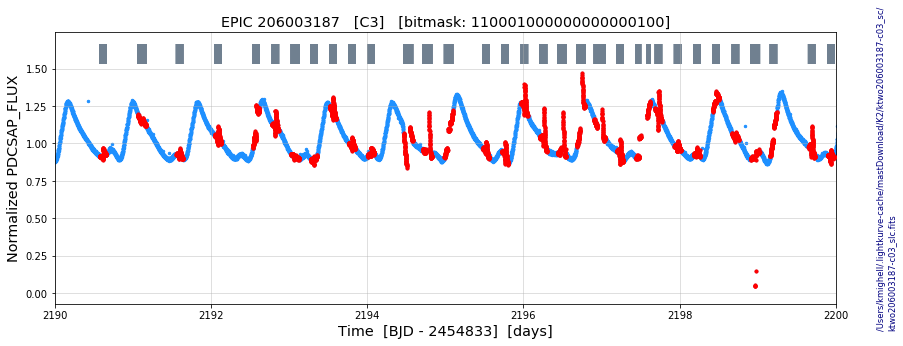


Note that most of the problematic features are now plotted as red (bad cadence).


 1900  events




In [27]:
bitmask = (2**20) + (2**19) + (2**15) + (2**2)

filename = 'ktwo206003187-c03_slc.fits'
SAP_FLUX = False
n_before = 60
n_after = 60 

print('\nShow the entire campaign:\n'); sys.stdout.flush()
ax, n_events, lcf_, jdx = k2_cadence_events(target=target,cadence=cadence,campaign=campaign,\
  bitmask=bitmask,SAP_FLUX=SAP_FLUX,n_before=n_before,n_after=n_after)
plt.show()

print('\nShow a good section of the observations:\n'); sys.stdout.flush()
ax, n_events, lcf_, jdx = k2_cadence_events(target=target,cadence=cadence,campaign=campaign,\
  bitmask=bitmask,SAP_FLUX=SAP_FLUX,n_before=n_before,n_after=n_after,xlim=(2150,2160),bitmask_decode=False)
plt.show()

print('\nShow a problematic section of the observations:\n'); sys.stdout.flush()
ax, n_events, lcf_, jdx = k2_cadence_events(target=target,cadence=cadence,campaign=campaign,\
  bitmask=bitmask,SAP_FLUX=SAP_FLUX,n_before=n_before,n_after=n_after,xlim=(2190,2200),bitmask_decode=False)
plt.show()

print('\nNote that most of the problematic features are now plotted as red (bad cadence).')
print('\n\n',n_events,' events\n\n')

#### Compare the phased light curves of the original and clipped data:


Show the phased light curve of the original data:



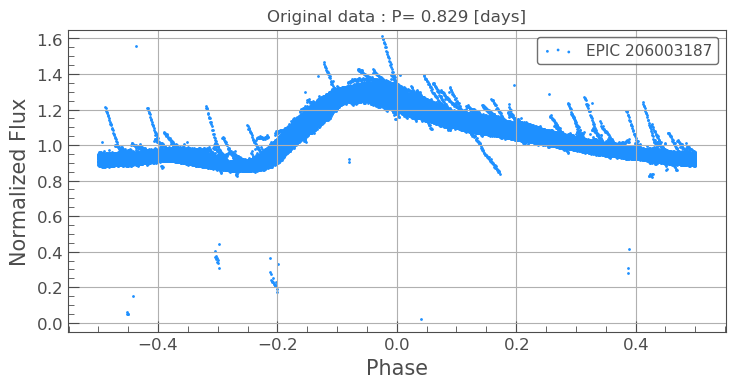


Show the phased light curve of the clipped data:



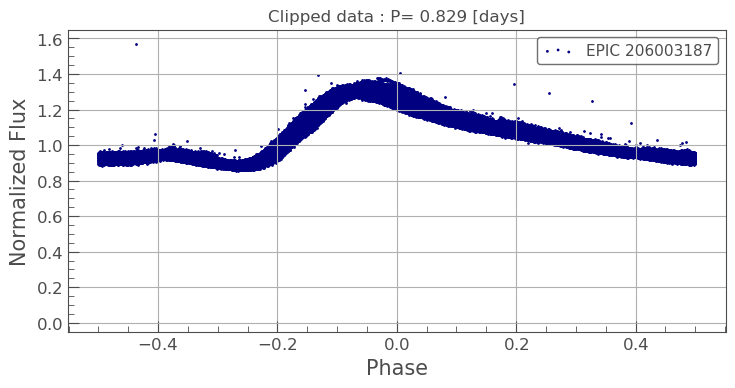

The  clipped data has  78669 observations (cadences).
The original data has  99656 observations (cadences).

n_before=60
 n_after=60


In [28]:
period = period_206003187 # days (should be 0.829 d) # EPIC_206003187 (a RR Lyrae (type ab) w/ Blazhko effect)

import logging
logging.getLogger('astropy').setLevel('WARNING')
#log.setLevel('WARNING')

print('\nShow the phased light curve of the original data:\n'); sys.stdout.flush()
with warnings.catch_warnings():
    # Ignore "LightCurve contains NaN times" warnings triggered by the liberal mask
    warnings.simplefilter("ignore", LightkurveWarning)
    lc_ = lcf_.get_lightcurve('PDCSAP_FLUX')
lca = lc_.remove_nans()
n_lca = lca.time.size
plca = lca.fold(period=period);
ax = plca.scatter(color=color[0])
ax.grid(True)
ax.set_title('Original data : P=%6.3f [days]' % (period))
ax.set_ylim(-0.05,1.65)
plt.show()

print('\nShow the phased light curve of the clipped data:\n')
sys.stdout.flush()
with warnings.catch_warnings():
    # Ignore "LightCurve contains NaN times" warnings triggered by the liberal mask
    warnings.simplefilter("ignore", LightkurveWarning)
    lc_ = lcf_.get_lightcurve('PDCSAP_FLUX')[~jdx]
lcc = lc_.remove_nans()
n_lcc = lcc.time.size
plcc = lcc.fold(period=period);
ax = plcc.scatter(color=color[3])
ax.grid(True)
ax.set_title('Clipped data : P=%6.3f [days]' % (period))
ax.set_ylim(-0.05,1.65);
plt.show()

print('The  clipped data has %6d observations (cadences).' % (n_lcc))
print('The original data has %6d observations (cadences).' % (n_lca))

print('\nn_before=%d' % (n_before))
print(' n_after=%d' % (n_after))

### The final phased light curve is clearly a significant improvement over the original.


# Command line mode 

k2_cadence_events.py can be directly used from the command line.

Assuming k2_cadence_events.py exists within the local directory, you can see the demo
with this command:
    
./k2_cadence_events.py

You can see the optional arguments with this command:

./k2_cadence_events -h


In [29]:
#EOF